In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2,l1
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.python import train
# Load the real and fake galaxy images from the directories
train_dir = '/content/drive/MyDrive/Group_Project_Data/Train'
test_dir = '/content/drive/MyDrive/Group_Project_Data/Valid'


train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(64, 64), batch_size=128, class_mode='binary',color_mode='grayscale')
#train images are loaded
x_train=[]
y_train=[]

for i in range(len(train_generator)):
  batch_x,batch_y=next(train_generator)
  x_train.append(batch_x)
  y_train.append(batch_y)

x_train=np.concatenate(x_train,axis=0)
y_train=np.concatenate(y_train,axis=0)
#test images are loaded
x_test=[]
y_test=[]

for i in range(len(test_generator)):
  batch_x,batch_y=next(test_generator)
  x_test.append(batch_x)
  y_test.append(batch_y)
x_test=np.concatenate(x_test,axis=0)
y_test=np.concatenate(y_test,axis=0)



Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


(64, 64, 1)


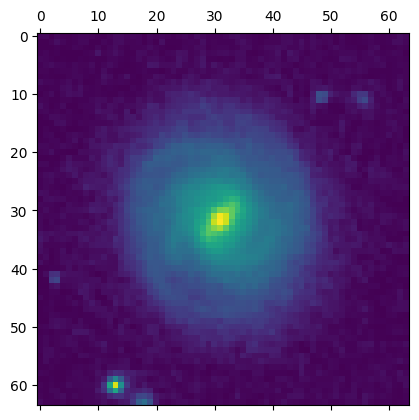

In [5]:
print(x_train[0].shape)
plt.matshow(x_train[0])

In [100]:
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout


model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(64, 64, 1)))

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 4
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))

# Dropout layer
model.add(Dropout(0.25))

# Dense layer 2
model.add(Dense(units=64, activation='relu'))

# Dropout layer
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 6, 6, 128)      

In [104]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [105]:
Early_Stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# Train the model
history = model.fit(x_train, y_train,batch_size=128,epochs=25, callbacks=[Early_Stop],
                    validation_data=(x_test, y_test))

Epoch 1/25
47/47 [==============================] - 5s 25ms/step - loss: 0.7496 - accuracy: 0.5532 - val_loss: 0.4310 - val_accuracy: 0.8370
Epoch 2/25
47/47 [==============================] - 1s 19ms/step - loss: 0.1466 - accuracy: 0.9703 - val_loss: 0.0782 - val_accuracy: 0.9865
Epoch 3/25
47/47 [==============================] - 1s 18ms/step - loss: 0.0944 - accuracy: 0.9785 - val_loss: 0.0745 - val_accuracy: 0.9850
Epoch 4/25
47/47 [==============================] - 1s 18ms/step - loss: 0.0681 - accuracy: 0.9872 - val_loss: 0.0598 - val_accuracy: 0.9840
Epoch 5/25
47/47 [==============================] - 1s 19ms/step - loss: 0.0305 - accuracy: 0.9970 - val_loss: 0.0287 - val_accuracy: 0.9965
Epoch 6/25
47/47 [==============================] - 1s 19ms/step - loss: 0.0633 - accuracy: 0.9847 - val_loss: 0.0856 - val_accuracy: 0.9815
Epoch 7/25
47/47 [==============================] - 1s 17ms/step - loss: 0.0601 - accuracy: 0.9902 - val_loss: 0.0430 - val_accuracy: 0.9935
Epoch 8/25
47

In [106]:
# Make predictions on new images
#new_image = cv2.imread('/content/drive/MyDrive/Documents/Group_Project_Data/Train/Fake/img_567.png')
#print(new_image.shape)
#new_image = cv2.resize(new_image, (64, 64))
#new_image = np.array([new_image])
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation metrics
print('Test loss:', loss)
print('Test accuracy:', accuracy)


prediction = model.predict(x_test)
#prediction_classes = np.argmax(prediction, axis=1)
y_pred = tf.where(prediction <= 0.5,0,1)
y_pred_classes = np.array(y_pred).reshape(-1,)
print('Pred: ',y_pred_classes[:20])

#y_test = y_test.reshape(-1,)
print("Test: ",y_test[:20])
labels = {0:'Fake', 1:'Real'}
# Convert label indices to label names
y_test_labels = [labels[y] for y in y_test]
pred_labels = [labels[y] for y in y_pred_classes]

print(y_test_labels[:10])  
print(pred_labels[:10])


#if(prediction>.60):
#  print('label 1')
#  print('image is real')
#else:
#  print('label 0')
#  print('image is fake')



63/63 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9990
Test loss: 0.0069955275394022465
Test accuracy: 0.9990000128746033
63/63 [==============================] - 0s 2ms/step
Pred:  [1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]
Test:  [1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
['Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real']
['Real', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real']


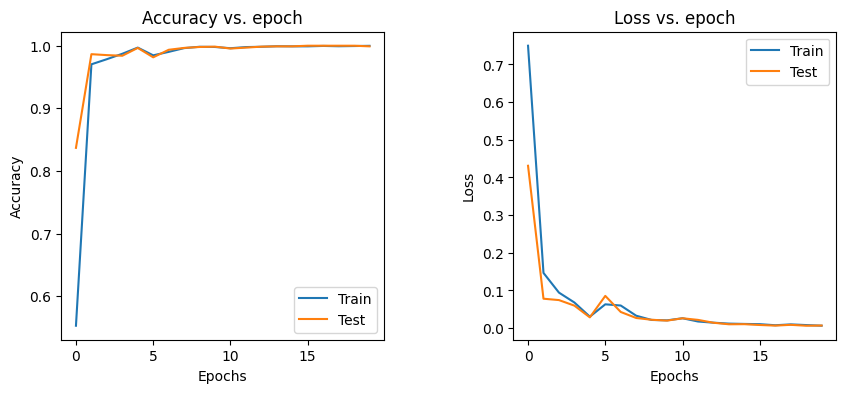

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Test')
axes[0].set_title("Accuracy vs. epoch")
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Test')
axes[1].set_title("Loss vs. epoch")
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.show()